In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [116]:
wine_df = pd.read_csv("winequality-red.csv", delimiter = ";")

In [117]:
inputs = wine_df.drop(['quality'], axis=1)
X = inputs.to_numpy()
t = wine_df['quality'].to_numpy()
N = wine_df.shape[0]
dim = X.shape[1]

In [118]:
# W* = (X * X_T )^-1 * X * t   
wStar = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ t
wStar

array([ 4.19374044e-03, -1.09974310e+00, -1.84145975e-01,  7.07117376e-03,
       -1.91141882e+00,  4.54780885e-03, -3.31855188e-03,  4.52914616e+00,
       -5.22898302e-01,  8.87076125e-01,  2.97022815e-01])

In [119]:
def err(X, w, t):
    return (X @ w -t) @ (X @ w -t) / N

def lms(X, t, iterCount, wStar):
    W = []
    randLim = np.random.randint(0, N, size = iterCount)
    #initW = np.zeros(dim)
    initW = np.random.rand(dim)
    for n in randLim: 
        W.append(np.linalg.norm(initW - wStar))
        initW = initW + (t[n] - initW @ X[n,:]) * X[n,:] / (np.linalg.norm(X[n,:])**2)
    return initW, W

# The function below is not part of HW 
# This one for testing and for fun
def lmskai(X, t, iterCount, wStar):
    W = []
    initW = np.zeros(dim)
    for i in range(int(iterCount/N)):  
        for n in range(N): 
            W.append(np.linalg.norm(initW - wStar))
            initW = initW + (t[n] - initW @ X[n,:]) * X[n,:] / (np.linalg.norm(X[n,:])**2)
    for n in range(int(iterCount%N)):
        W.append(np.linalg.norm(initW - wStar))
        initW = initW + (t[n] - initW @ X[n,:]) * X[n,:] / (np.linalg.norm(X[n,:])**2)
    return initW, W

0.4170492248204845
0.5286590723694782


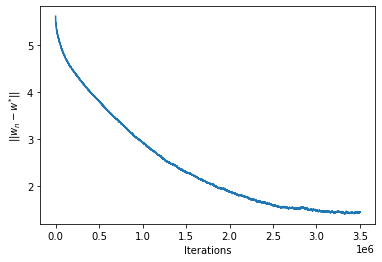

Wall time: 1min 11s


In [120]:
%%time
itercount = 100000
print(err(X, wStar, t))
lmsW, W = lms(X, t, itercount*35, wStar = wStar)
print(err(X, lmsW, t))
plt.plot(range(itercount*35), W)
plt.xlabel('Iterations')
plt.ylabel(r'$\||w_{n} - w^{*}\||$')
plt.show()

0.4170492248204845
0.4787700757322686


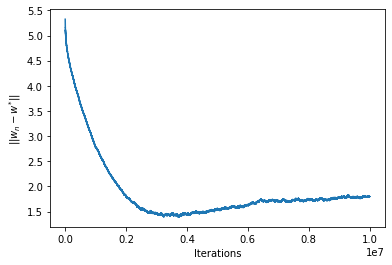

Wall time: 3min 19s


In [121]:
%%time
print(err(X, wStar, t))
lmsW, W = lms(X, t, itercount*100, wStar = wStar)
print(err(X, lmsW, t))
plt.plot(range(itercount*100), W)
plt.xlabel('Iterations')
plt.ylabel(r'$\||w_{n} - w^{*}\||$')
plt.show()

0.4170492248204845
0.4891356822419216


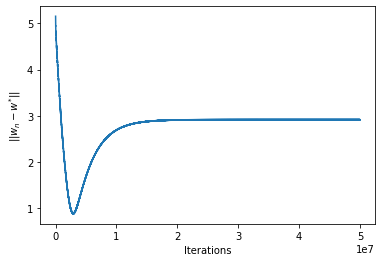

Wall time: 16min 31s


In [97]:
%%time
print(err(X, wStar, t))
lmsW, W = lmskai(X, t, itercount*500, wStar = wStar)
print(err(X, lmsW, t))
plt.plot(range(itercount*500), W)
plt.xlabel('Iterations')
plt.ylabel(r'$\||w_{n} - w^{*}\||$')
plt.show()

In [98]:
import winsound
winsound.Beep(440, 5000)

In [103]:
W[-50:]

[2.9124745195927932,
 2.9124750690584804,
 2.912410749023238,
 2.9124091023470533,
 2.912420614746933,
 2.912420614746933,
 2.912436951304867,
 2.912471576527611,
 2.912301192943883,
 2.911488517942077,
 2.9115868108410274,
 2.911492546936322,
 2.913009411629996,
 2.9121753853860914,
 2.9124647867149753,
 2.912229594685018,
 2.9119417006878248,
 2.9119171124704994,
 2.9119270832896795,
 2.9119270832896795,
 2.9119931755454873,
 2.9119703049783214,
 2.9119929151457358,
 2.911951596565904,
 2.91195108688982,
 2.91194827027527,
 2.911953538123803,
 2.9119099068842957,
 2.9119099068842957,
 2.911955247196319,
 2.9119347309066312,
 2.911936311570167,
 2.9119452025482038,
 2.9119452025482038,
 2.9119375911007452,
 2.911907566208433,
 2.911907566208433,
 2.9122339854587533,
 2.9115273541629922,
 2.9115620636616306,
 2.911611877831597,
 2.9115152788572822,
 2.9115134192938967,
 2.9115325101902814,
 2.911602487256208,
 2.9115505371689148,
 2.911550526011354,
 2.911550518924487,
 2.9115528727365

In [111]:
import pandas as pd
from sklearn import preprocessing
inputs = wine_df.drop(['quality'], axis=1)
x = inputs.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled).values
X

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [104]:
t = t / np.linalg.norm(t)
wStar = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ t
wStar

array([ 0.01538115,  0.0007172 ,  0.00169984, -0.001101  ,  0.00520603,
        0.00279561,  0.00182739,  0.00326183,  0.02175857,  0.00995728,
        0.01292408])

In [14]:
def err(X, w, t):
    return (X @ w -t) @ (X @ w -t) / N

def lms(X, t, iterCount, wStar = None):
    W = []
    randLim = np.random.randint(0, N, size = iterCount)
    initW = np.zeros(dim)
    for n in randLim:
        if wStar is not None:
            W.append(np.linalg.norm(initW - wStar))
        initW = initW + (t[n] - initW @ X[n,:]) * X[n,:] / (np.linalg.norm(X[n,:])**2)
    if wStar is not None:
        W.append(np.linalg.norm(initW - wStar))
    return initW, W